<a href="https://colab.research.google.com/github/gummadidalaashishkumar/AI-ML-Internship-Task-3/blob/main/Iris_Species_Diversity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset you uploaded
df_iris = pd.read_csv('Iris.csv')

# Drop the 'Id' column as it is not needed for analysis
if 'Id' in df_iris.columns:
    df_iris = df_iris.drop('Id', axis=1)

# Display basic information
print(df_iris.info())
print(df_iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


1. Distribution of Floral Measurements
We are checking the distribution of Sepal and Petal dimensions to see the range of values in the dataset.

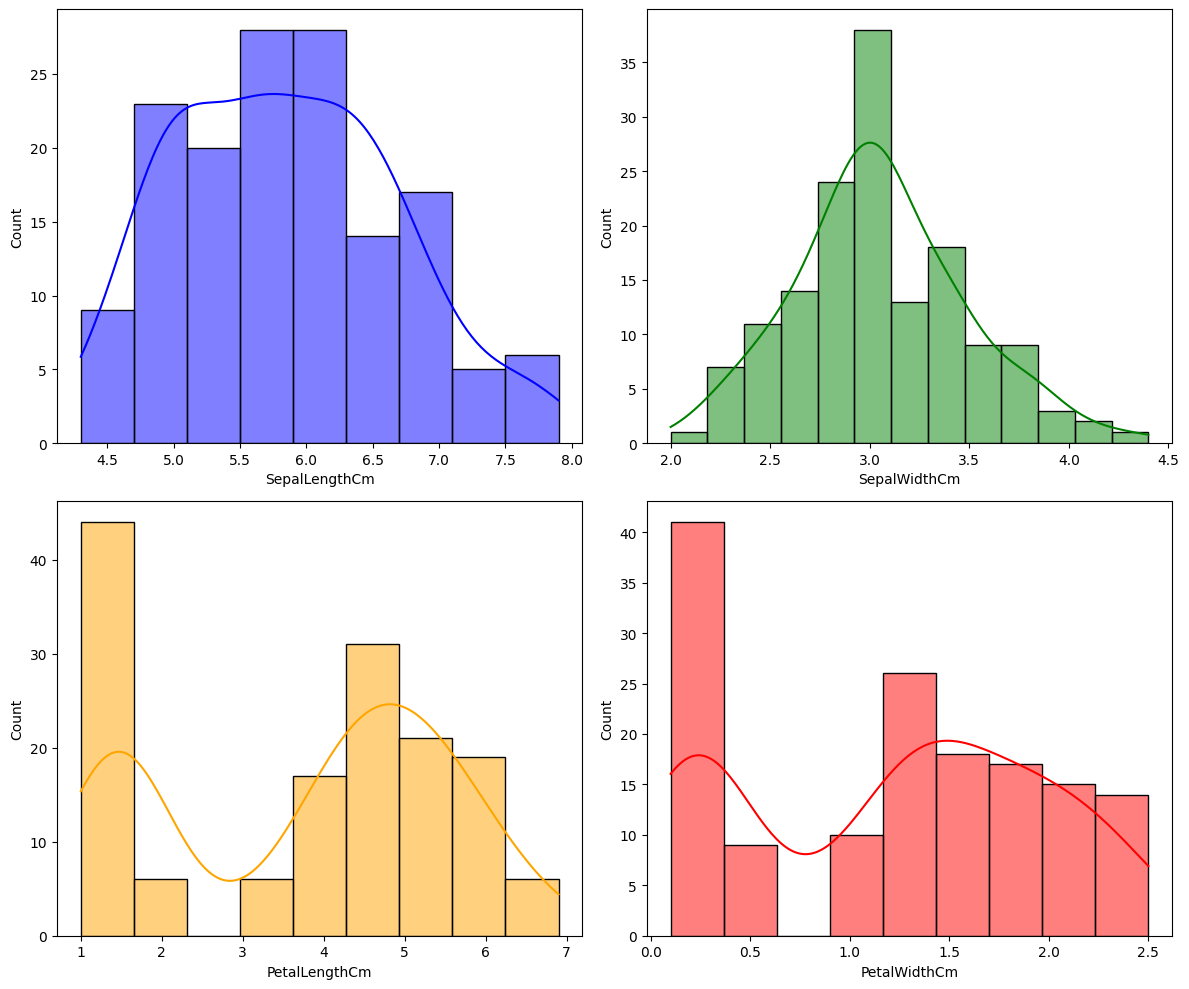

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df_iris['SepalLengthCm'], kde=True, ax=axes[0, 0], color='blue')
sns.histplot(df_iris['SepalWidthCm'], kde=True, ax=axes[0, 1], color='green')
sns.histplot(df_iris['PetalLengthCm'], kde=True, ax=axes[1, 0], color='orange')
sns.histplot(df_iris['PetalWidthCm'], kde=True, ax=axes[1, 1], color='red')

plt.tight_layout()
plt.show()

The PetalLengthCm and PetalWidthCm show a clear gap in the distribution, suggesting that one species (Setosa) is significantly smaller than the others.

2. Species Frequency
This plot confirms if our dataset has an equal representation of all Iris species.

/tmp/ipython-input-1360070197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df_iris, palette='viridis')


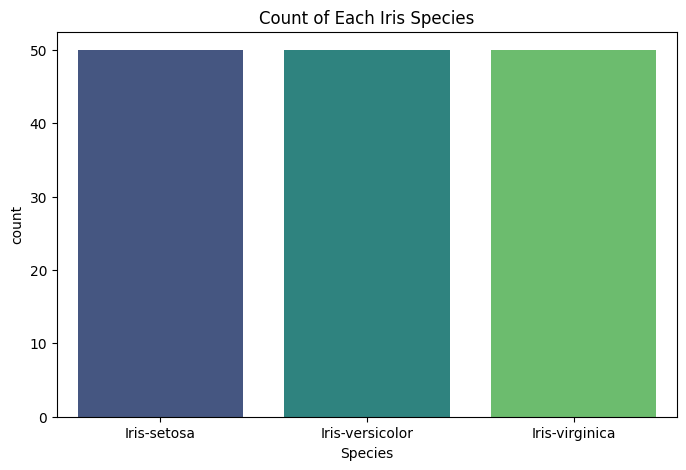

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=df_iris, palette='viridis')
plt.title('Count of Each Iris Species')
plt.show()

The dataset is perfectly balanced with 50 samples for each species: Iris-setosa, Iris-versicolor, and Iris-virginica.

3. Detecting Outliers
We use box plots to identify any unusual measurements that differ significantly from the rest of the data.

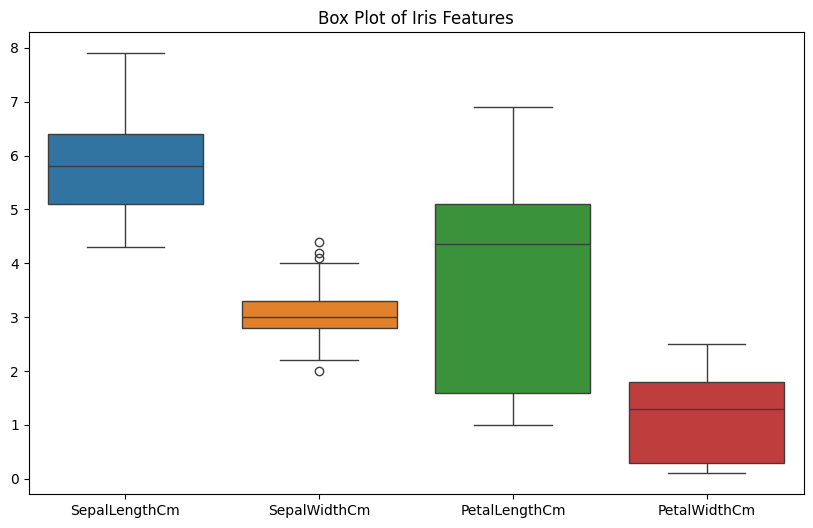

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris)
plt.title('Box Plot of Iris Features')
plt.show()

SepalWidthCm is the only column showing outliers. This means most flowers follow a standard width, but a few individuals have exceptionally wide sepals.

4. Feature Correlation
We look for relationships between features. For example, do flowers with longer petals also have wider petals?

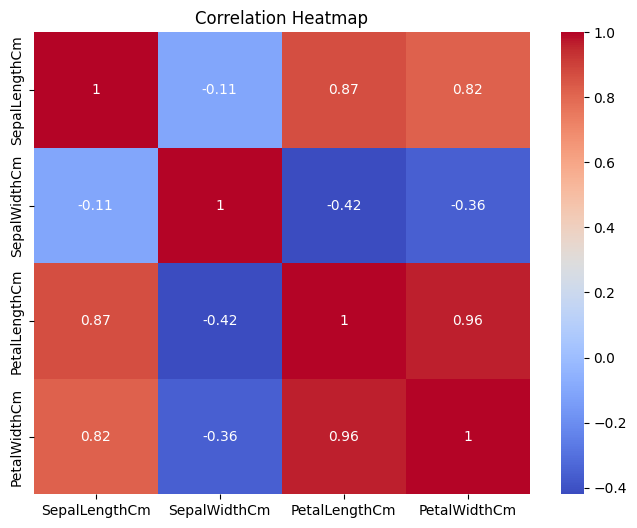

In [8]:
plt.figure(figsize=(8, 6))
# We only correlate numerical columns
sns.heatmap(df_iris.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There is a near-perfect correlation (0.96) between PetalLengthCm and PetalWidthCm. This confirms they are the most powerful indicators for identifying the flower species.

Features Important for Prediction
Based on the analysis, the most important features for a Machine Learning model would be:

PetalLengthCm & PetalWidthCm: These provide the strongest separation between the three species.

SepalLengthCm: Useful for distinguishing between Versicolor and Virginica.

Summary of Iris Analysis
Class Balance: The dataset is perfectly balanced, which is ideal for training classification models.

Feature Relationship: Petal length and width grow in almost perfect proportion to each other.

Species Separation: Iris-setosa is easily identifiable as it has much smaller petals compared to the other two species.

Data Quality: The data is very clean, with very few outliers found only in the Sepal Width category.